<a href="https://colab.research.google.com/github/data-tamer2410/ds_analysis_of_birth_rates_in_ukrainian_regions/blob/main/analysis_of_birth_rates_in_ukrainian_regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading and clearing data.

In [32]:
tables = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8')
df = pd.DataFrame(tables[12])

In [33]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


Dataset "Fertility rate in the regions of Ukraine (1950—2019)"

In [34]:
df.shape

(28, 9)

In [35]:
df[df.isin(["—"])].any()

,0
Регіон,False
1950,False
1960,False
1970,False
1990,False
2000,False
2012,False
2014,True
2019,True


In [36]:
df.replace("—",np.nan,inplace=True)

In [37]:
df.dtypes

,0
Регіон,object
1950,float64
1960,float64
1970,float64
1990,int64
2000,int64
2012,int64
2014,object
2019,object


In [38]:
df.set_index('Регіон', inplace=True)

In [39]:
df = df.astype(float)

In [40]:
df.head()

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.0,206.0,160.0,130.0,73.0,126.0,NaN,NaN
Вінницька,224.0,192.0,142.0,124.0,84.0,112.0,109.0,76.0
Волинська,247.0,250.0,179.0,153.0,112.0,148.0,141.0,101.0
Дніпропетровська,204.0,204.0,151.0,123.0,71.0,112.0,111.0,71.0
Донецька,271.0,214.0,140.0,109.0,61.0,98.0,82.0,NaN


In [41]:
df.isnull().sum()

,0
1950,2
1960,1
1970,1
1990,0
2000,0
2012,0
2014,2
2019,4


In [42]:
df.iloc[-1]

,Україна
1950,228.0
1960,205.0
1970,152.0
1990,126.0
2000,78.0
2012,114.0
2014,111.0
2019,81.0


In [43]:
df.drop('Україна',inplace=True)
df.tail()

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Черкаська,205.0,179.0,144.0,123.0,75.0,100.0,98.0,64.0
Чернівецька,247.0,218.0,170.0,148.0,101.0,128.0,129.0,92.0
Чернігівська,220.0,183.0,127.0,108.0,69.0,94.0,90.0,61.0
Київ,NaN,174.0,159.0,120.0,73.0,120.0,121.0,110.0
Севастополь,NaN,NaN,NaN,125.0,70.0,120.0,NaN,NaN


## Analysis data.

In [44]:
df[df['2019'] > df['2019'].mean()] #a list of regions where the birth rate in 2019 was higher than the average for Ukraine

,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Волинська,247.0,250.0,179.0,153.0,112.0,148.0,141.0,101.0
Закарпатська,314.0,273.0,207.0,168.0,115.0,151.0,146.0,104.0
Івано-Франківська,243.0,248.0,182.0,155.0,103.0,124.0,122.0,88.0
Львівська,234.0,240.0,171.0,140.0,91.0,119.0,119.0,87.0
Одеська,241.0,192.0,148.0,126.0,80.0,127.0,123.0,88.0
Рівненська,269.0,267.0,193.0,158.0,118.0,159.0,148.0,107.0
Херсонська,208.0,214.0,166.0,143.0,85.0,117.0,115.0,81.0
Чернівецька,247.0,218.0,170.0,148.0,101.0,128.0,129.0,92.0
Київ,NaN,174.0,159.0,120.0,73.0,120.0,121.0,110.0


In [45]:
max_id = df['2014'].idxmax() #the highest birth rate in 2014
df.loc[max_id]

,Рівненська
1950,269.0
1960,267.0
1970,193.0
1990,158.0
2000,118.0
2012,159.0
2014,148.0
2019,107.0


## Construction of graphs.

<Axes: xlabel='1950', ylabel='1960'>

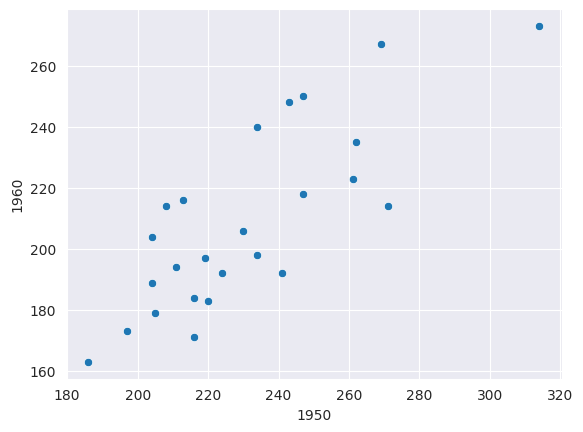

In [46]:
sns.scatterplot(x='1950',y='1960',data=df) #birth rate in Ukraine in 1950 compared to 1960

<Axes: xlabel='2019', ylabel='Регіон'>

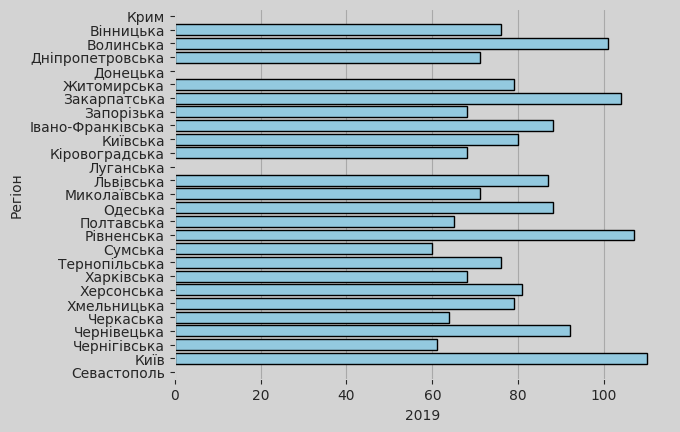

In [47]:
sns.set_style('ticks',rc={
                          'patch.edgecolor': 'black',
                          'axes.grid': True,
                          'grid.color': 'darkgray',
                          'axes.edgecolor': 'lightgrey',
                          'axes.facecolor': 'lightgrey',
                          'figure.facecolor':'lightgrey'
                          })
sns.barplot(y=df.index,x='2019',data=df,color='#87CEEB')  #bar chart of birth rates by region in 2019

The graph shows that Kyiv had the highest birth rate and Sumshchyna had the lowest birth rate in the 1950s.

In [48]:
sns.set_style('darkgrid')
df_t = df.T
df_t.head()

Регіон,Крим,Вінницька,Волинська,Дніпропетровська,Донецька,Житомирська,Закарпатська,Запорізька,Івано-Франківська,Київська,...,Сумська,Тернопільська,Харківська,Херсонська,Хмельницька,Черкаська,Чернівецька,Чернігівська,Київ,Севастополь
1950,230.0,224.0,247.0,204.0,271.0,261.0,314.0,219.0,243.0,204.0,...,216.0,213.0,197.0,208.0,234.0,205.0,247.0,220.0,NaN,NaN
1960,206.0,192.0,250.0,204.0,214.0,223.0,273.0,197.0,248.0,189.0,...,184.0,216.0,173.0,214.0,198.0,179.0,218.0,183.0,174.0,NaN
1970,160.0,142.0,179.0,151.0,140.0,159.0,207.0,150.0,182.0,156.0,...,132.0,157.0,140.0,166.0,148.0,144.0,170.0,127.0,159.0,NaN
1990,130.0,124.0,153.0,123.0,109.0,129.0,168.0,124.0,155.0,123.0,...,115.0,142.0,114.0,143.0,129.0,123.0,148.0,108.0,120.0,125.0
2000,73.0,84.0,112.0,71.0,61.0,89.0,115.0,71.0,103.0,73.0,...,70.0,92.0,68.0,85.0,85.0,75.0,101.0,69.0,73.0,70.0


<Axes: >

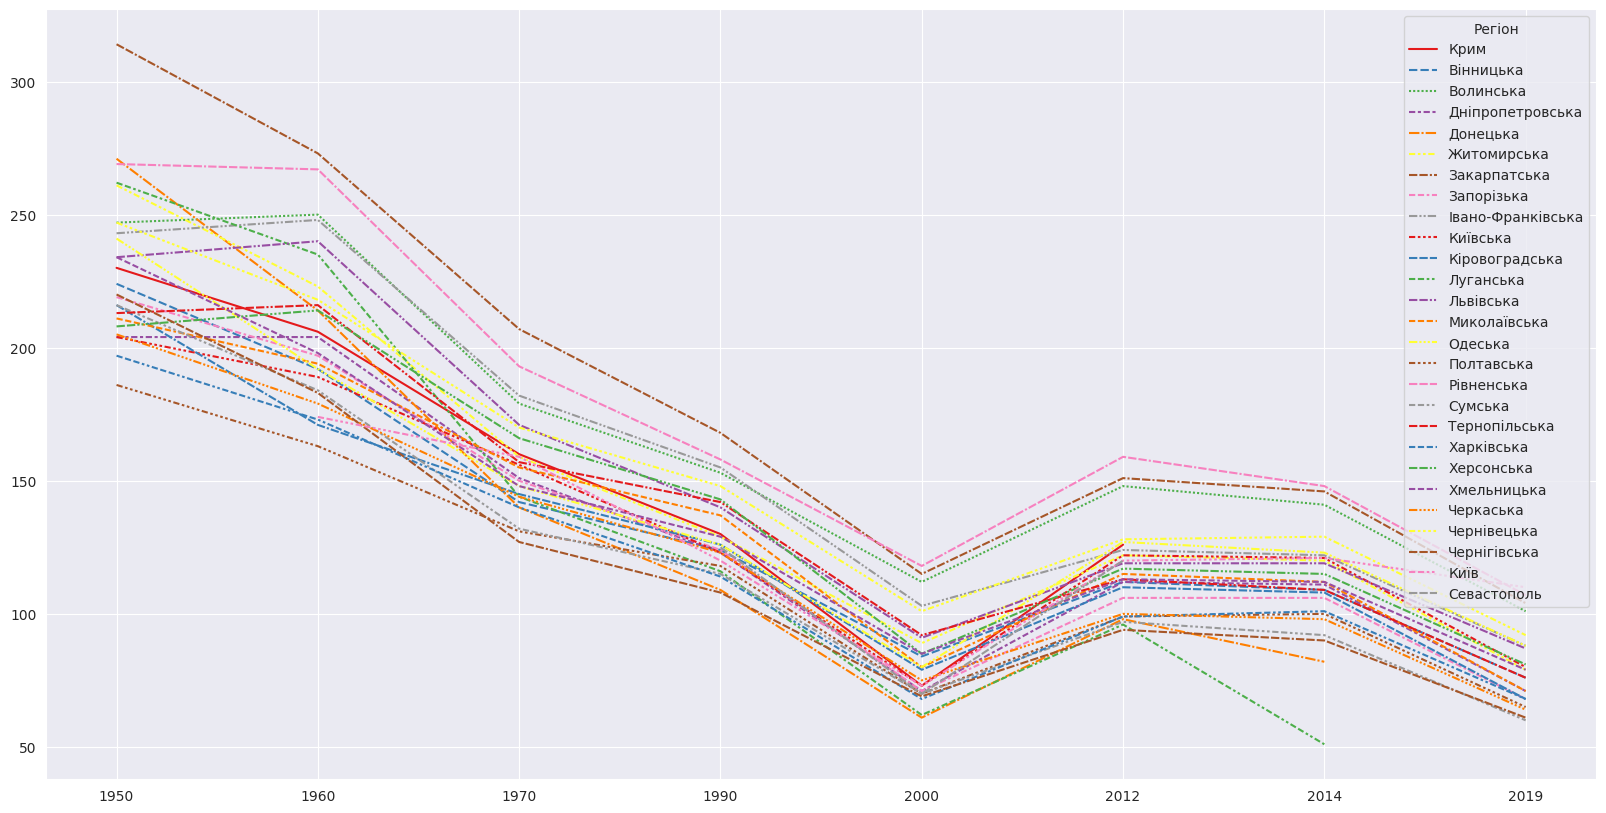

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_t,palette='Set1') #linear graph of birth rates in all regions for 1950-2019

The graph indicates that in the year 2000, most regions exhibited the lowest birth rates within the observed period (1950-2019). However, beginning in 2000, birth rates across all regions start to show an upward trend.

Additionally, a significant decline in the birth rate is observed in the Luhansk region in 2014, which can likely be attributed to the invasion of Russian troops into the region during that year.

<Axes: >

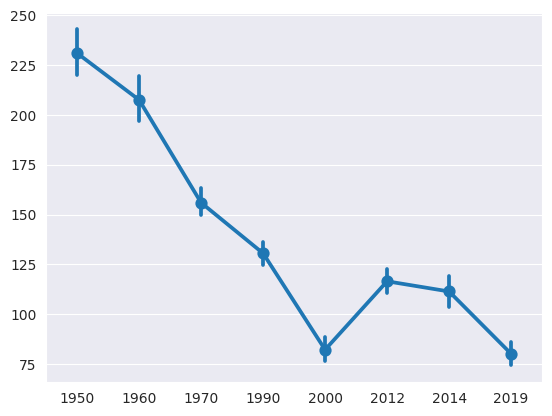

In [50]:
sns.pointplot(data=df) #linear graph of the average coefficient for (1950-2019) years

This graph shows in more detail that the year 2000 is the lowest in terms of the birth rate in Ukraine for the period from 1950 to 2019.

<Axes: xlabel='Регіон'>

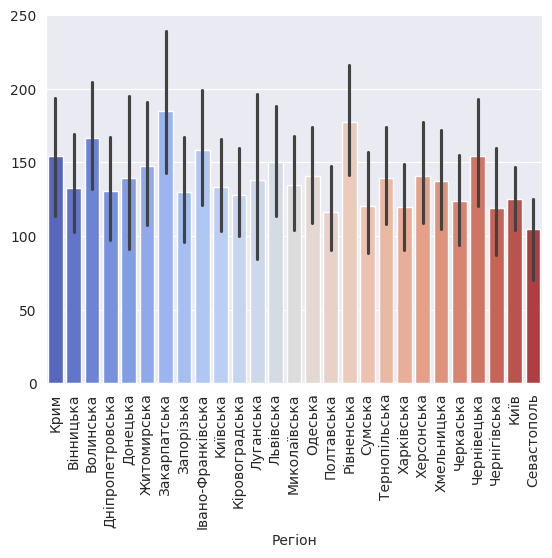

In [51]:
plt.xticks(rotation=90)
sns.barplot(data=df_t,palette='coolwarm') #bar graph of the average birth rate for each region from 1950 to 2019

## Conclusion.

Conclusion on the Analysis of Fertility Rates in the Regions of Ukraine (1950–2019):

The conducted analysis revealed several important trends in fertility rate changes across Ukraine from 1950 to 2019:


1.   The lowest fertility rates were observed in the year 2000 across most regions of Ukraine, indicating a significant decline in birth rates at the end of the 20th century.

2.   Starting from 2000, birth rates in all regions began to rise, suggesting a demographic recovery in Ukraine at the beginning of the 21st century.

3.   A notable observation is the sharp decline in birth rates in the Luhansk region in 2014, likely due to the invasion of Russian troops and the ensuing military conflict in the region.

4.  In 2019, regions such as Kyiv and Zakarpattia had birth rates higher than the national average, while Sumy region recorded the lowest birth rates.

5.  An analysis of the average fertility rates over the entire period (1950–2019) showed that regions like Rivne and Zakarpattia consistently exhibited high fertility rates.

Graphical visualizations confirm these trends, illustrating both the general changes and specific patterns for each region.